# **TUGAS 1 GDSC ITB - Solving Real-World Problems with Data Science**

Nama          : Akifa Nabil Ufairah

NIM           : 13519179

Universitas   : Instituts Teknologi Bandung

Tanggal Mulai : 14 November 2020

Sumber data   : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

# **BREAST CANCER CLASSIFIER**

In [53]:
# Import library yang dibutuhkan

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Data yang digunakan adalah Breast Cancer Wisconsin (Diagnostic) Data Set dari website UCI di link berikut https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 . Informasi dari atribut-atribut terdapat pada website tersebut.

Secara garis besar data ini menyimpan nilai-nilai dari beberapa karakteristik Nukleus / Inti sel orang-orang yang mengidap Breast Cancer.

Dari data ini ingin dilakukan pemodelan sehingga model dapat mengklasifikasikan apakah seorang pengidap breast-cancer didiagnosis pada kategori M (Malignant/Ganas) atau B (Benign/Jinak) menggunakan algoritma KNN-Classifier.

In [42]:
# Load data set

df = pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Clean and Prepare Data**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [44]:
# Cek apakah ada data kosong atau tidak pada tiap kolom
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [45]:
# Menghapus atribut yang tidak diperlukan

# Menghapus atributs ID
df = df.drop(columns=['id'],axis=1)
# Menghapus atribut pada kolom 11-30, karena pada model ini hanya akan digunakan nilai mean dari tiap deskripsi nukleus yang diberikan.
df = df.drop(df.iloc[:,11:31],axis=1)

In [46]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


# **DATA EXPLORATION**


B    357
M    212
Name: diagnosis, dtype: int64

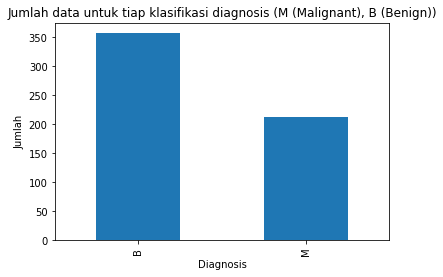

In [47]:
df['diagnosis'].value_counts().plot(kind="bar")
plt.title("Jumlah data untuk tiap klasifikasi diagnosis (M (Malignant), B (Benign))")
plt.xlabel("Diagnosis")
plt.ylabel('Jumlah')
df['diagnosis'].value_counts()

In [48]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


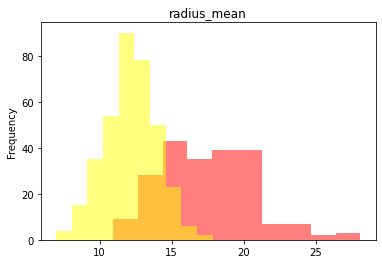

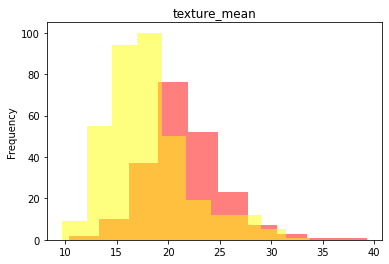

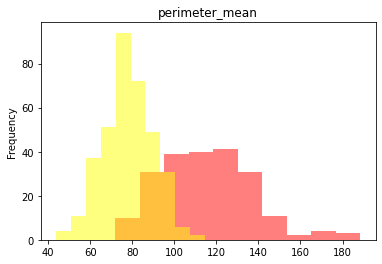

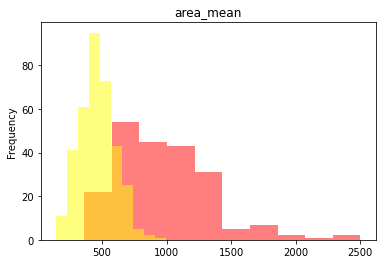

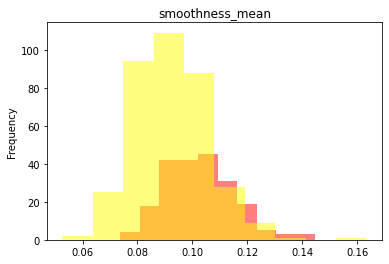

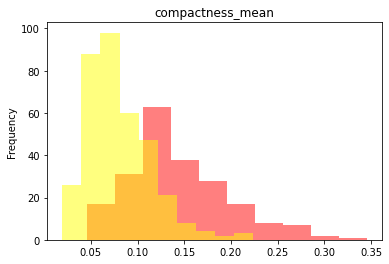

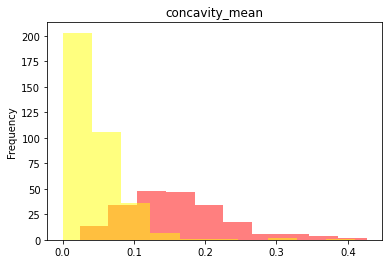

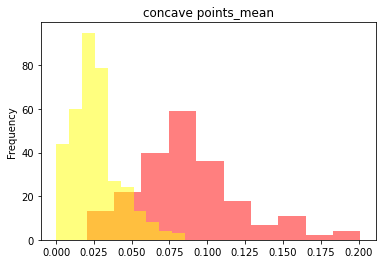

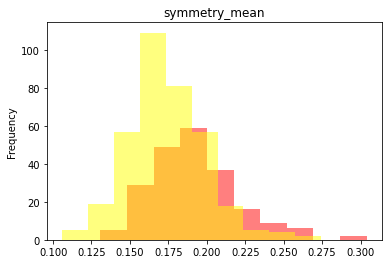

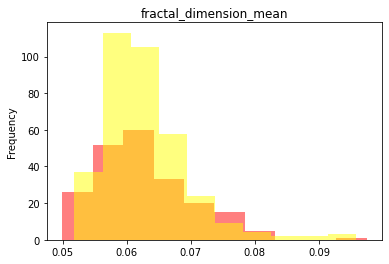

In [49]:
features = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean', 'symmetry_mean','fractal_dimension_mean']
for feature in features:
  plt.figure()
  df[feature].loc[df['diagnosis']=='M'].plot.hist(color='red', title = feature, alpha=0.5)
  df[feature].loc[df['diagnosis']=='B'].plot.hist(color='yellow',alpha=0.5)
  plt.show()

Bar berwarna merah menunjukkan kelompok diagnosis Malignant, sedangkan bar berwarna kuningmenunjukkan kelompok diagnosis Benign.

Dari visualisasi perbandingan tiap data atribut dengan jumlah data sesuai kelas diagnosisnya, terlihat bahwa untuk atribut- atribut'radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_mean', semakin besar besar nilainya maka kemungkinan data diklasifikasikan pada kelompok Malignant akan semakin besar (Ditandai dengan semakin ke kanan bar dominan merah). Sedangkan atribut 'texture_mean','smoothness_mean', 'symmetry_mean','fractal_dimension_mean' tidak menunjukkan perbedaan dan pengaruh yang begitu jelas antara kelompok malignant dan benign (Terlihat dari grafik bar berwarna orange lebih dominan)


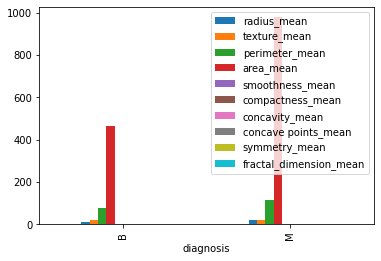

In [50]:
groupby_diagnosis = df.groupby(['diagnosis']).mean()
groupby_diagnosis.plot(kind='bar')

In [55]:
corr = df.corr()

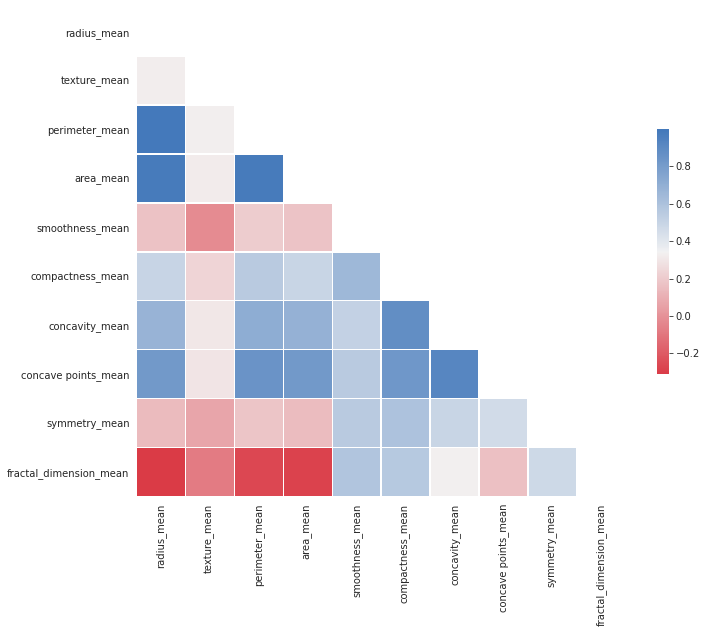

In [56]:
# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# **Splitting Data**

Pada tahap ini datataset akan dibagi menjadi 4, yaitu training_data serta training_labels yang digunakan sebagai training set dan validation_set validation_labels yang digunakan sebagai test set

In [57]:
# Memisahkan data label dari atribut lain yang akan dijadikan parameter untuk mengklasifikasikan data berdasarkan labelnya
labels = df["diagnosis"]
labels.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [58]:
# Menghapus kolom 'diagnosis' pada df
df = df.drop('diagnosis', axis=1)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [59]:
# Split data menjadi training dan validation data, dengan perbandingan training data dan validation data adalah 4:1

training_data, validation_set, training_labels, validation_labels = train_test_split(df,labels,test_size=0.2,random_state=100)

In [60]:
# Cek apakah split data berhasil (Seharusnya length dari training_data dan validation_set sama begitu juga dengan training_labels dan validation_labels

print('Length of Training Data :',len(training_data),'\nLength of Training Labels :',len(training_labels))
print('Length of Validation Set :',len(validation_set),'\nLength of Validation Labels :',len(validation_labels))

Length of Training Data : 455 
Length of Training Labels : 455
Length of Validation Set : 114 
Length of Validation Labels : 114


# **PEMODELAN**

Pemodelan dilakukan dengan menggunakan Algoritma KNN-Classifier

In [86]:
#Menemukan nilai k yang menyebabkan akurasi terbaik dengan menyimpan nilai akurasi pada setiap pengulangan pada nilai k di range 1 sampai 100.

accuracies=[]
for k in range (1,101):
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(training_data,training_labels)
  accuracies.append(classifier.score(validation_set, validation_labels))

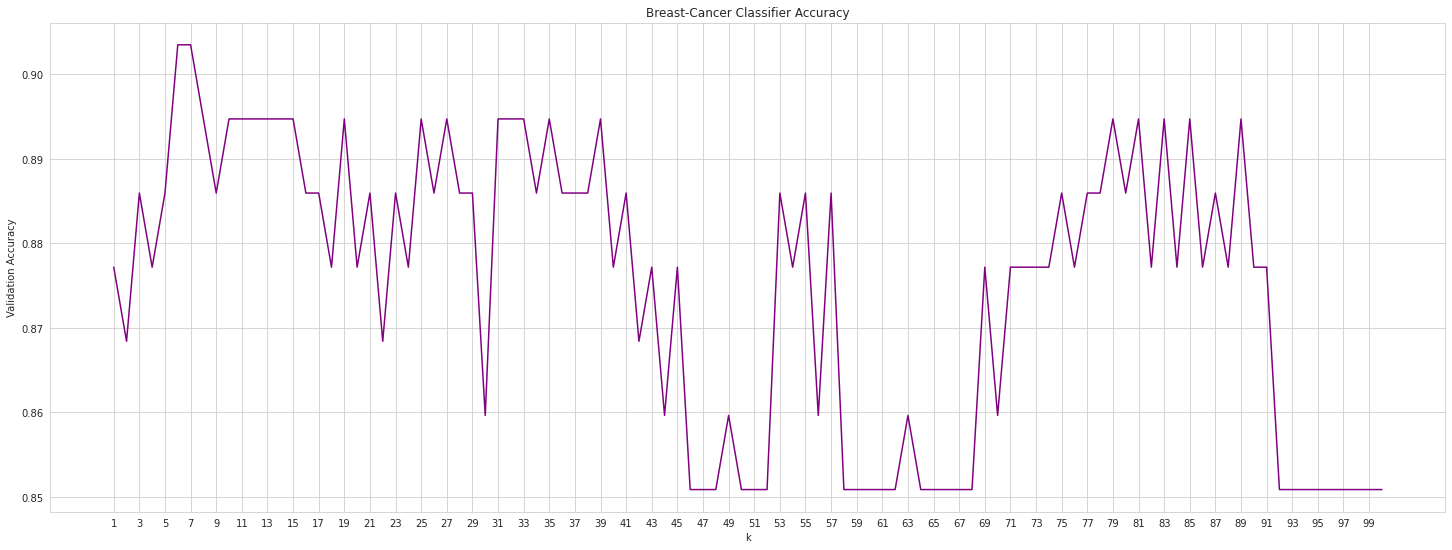

In [87]:
# Menampilkan hasil perhitungan nilai akurasi pada grafik
k_list=range(1,101)

sns.set_style(style = 'whitegrid')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(25, 9))


# Draw plot
plt.plot(k_list,accuracies,"purple")
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast-Cancer Classifier Accuracy")
plt.xticks(np.arange(min(k_list), max(k_list)+1, 2.0))
plt.show()

In [90]:
print(np.max(accuracies))
print(accuracies[6])

0.9035087719298246
0.9035087719298246


Dari grafik terlihat bahwa saat nilai k = 7, akurasi dari penerapan algoritma ini pada data paling tinggi yaitu sebesar 90.35%

# **PRESENTATION**

Dari pemodelan yang dilakukan menggunakan KNN-Classifier serta evaluasi akurasi pada setiap nilai k dari range 1-100, diperoleh nilai k=6 adalah pilihan terbaik untuk akurasi pada model dan data ini. Dengan mengambil nilai k=6 dari dapat dilakukan klasifikasi apakah seorang penderita Breast Cancer didiagnosis Malignant atau Benign dengan akurasi sekitar 90.35%